In [374]:
import pandas as pd
import numpy as np
from utils.imageprocessing import *
from sklearn.model_selection import train_test_split

### Load data

In [375]:
df_codis_color_info =  pd.read_csv("data/codis_info.csv")

### Preprocessing

In [376]:
color1 = df_codis_color_info.filter(regex = "color1_[RGB]").values
color2 = df_codis_color_info.filter(regex = "color2_[RGB]").values
color3 = df_codis_color_info.filter(regex = "color3_[RGB]").values

In [377]:
X0 = np.concatenate([color1, color2], axis = 1)
y = color3

In [378]:
X0_train, X0_test, y_train, y_test = train_test_split(X0, y, test_size = 0.001)

In [379]:
X0_train.shape, X0_test.shape, y_train.shape, y_test.shape

((1114, 6), (2, 6), (1114, 3), (2, 3))

In [380]:
### change form (sample, timesteps, input_dim)
X_train = X0_train.reshape((X0_train.shape[0], 2, 3)) /256
X_test = X0_test.reshape((X0_test.shape[0], 2, 3)) /256

In [381]:
### change form (sample, timesteps, input_dim)
X = X0.reshape((X0.shape[0], 2, 3)) /256
y = y

### Modeling(RNN)

In [382]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import TimeDistributed
from keras.optimizers import SGD

In [383]:
np.random.rand(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(2,3)))
model.add(Dense(10, activation="relu"))
model.add(Dense(3, activation="linear"))
model.compile(loss="mse", optimizer="adam")

In [384]:
history = model.fit(X, y, epochs=10000, verbose=0)

KeyboardInterrupt: 

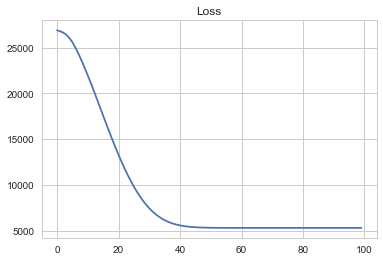

In [373]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

### 확인

[ 225.59596231  231.41857335  234.08371467]
[-92.77222443  33.84045792 -90.65808868]


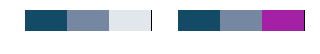

[ 111.72345437  129.03159961  134.94425908]
[-92.77222443  33.84045792 -90.65808868]


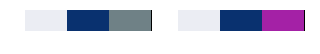

[ 242.42732558  243.39593023  245.61598837]
[-92.77222443  33.84045792 -90.65808868]


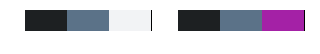

[ 98.93036623  98.52997208  67.6359008 ]
[-138.63491821   37.86972809 -137.7096405 ]


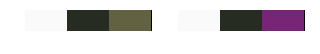

[ 228.9212612   229.31030324  230.06082012]
[-92.77224731  33.84046173 -90.6581192 ]


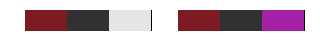

[ 27.72964417  28.16867165  29.4408003 ]
[-92.77222443  33.84045792 -90.65808868]


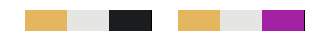

[ 102.08095839  105.14602774   82.76645649]
[-92.77222443  33.84045792 -90.65808868]


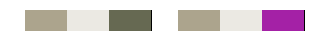

[ 213.24304597  212.95743736  212.06115605]
[-92.77240753  33.84047318 -90.65828705]


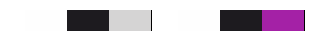

[ 44.61550388  60.89767442  76.51782946]
[-92.77222443  33.84045792 -90.65808868]


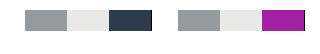

[ 223.19782214  221.73756806  227.9800363 ]
[-279.35858154   50.23300934 -282.08111572]


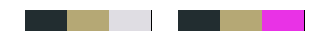

[ 218.92608882  207.45923622  195.27644282]
[-92.99116516  33.85969162 -90.88270569]


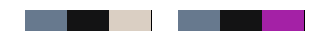

[ 240.16676185  236.29868646  228.2055968 ]
[-107.2638855    35.11362457 -105.52540588]


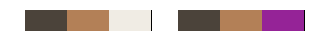

[ 210.03590604  213.82181208  219.47248322]
[-92.9865799   33.85929108 -90.87800598]


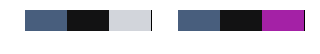

[ 175.14454594  175.22944653  175.97743149]
[-92.77222443  33.84045792 -90.65808868]


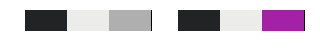

[ 80.11413969  64.67404884  54.49119818]
[-92.77222443  33.84045792 -90.65808868]


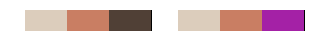

[ 252.64321192  252.51448675  251.6138245 ]
[-95.0249939   34.03837585 -92.96925354]


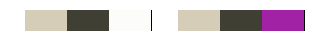

[ 34.15849338  32.52172292  29.87339176]
[-92.7769928   33.84087753 -90.66298676]


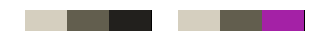

[ 126.80246914  129.74250441  129.11992945]
[-92.77222443  33.84045792 -90.65808868]


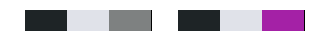

[ 117.06516588  135.93056872  162.27037915]
[-92.77222443  33.84045792 -90.65808868]


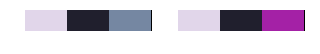

[ 220.6615991   105.96114865   54.51295045]
[-92.77427673  33.84063721 -90.6601944 ]


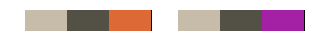

[ 225.46568332  226.30794702  223.11258278]
[-92.77222443  33.84045792 -90.65808868]


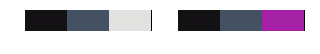

[ 161.81294964  161.79856115  166.8057554 ]
[-92.77223969  33.84045792 -90.65811157]


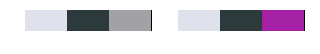

[ 242.74365704  243.50568679  243.93088364]
[-92.77222443  33.84045792 -90.65808868]


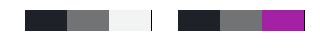

[ 158.52694851  159.99499098  162.6537768 ]
[-92.77222443  33.84045792 -90.65808868]


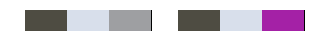

[ 237.52037915  239.45402844  240.92890995]
[-92.77222443  33.84045792 -90.65808868]


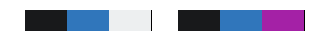

[ 242.96136457  241.75297986  239.02671599]
[-92.77222443  33.84045792 -90.65808868]


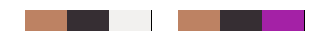

[ 229.68225806  231.31989247  232.04247312]
[-92.77222443  33.84045792 -90.65808868]


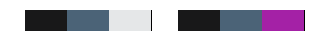

[ 219.29118329  224.39814385  233.18213457]
[-92.77222443  33.84045792 -90.65808868]


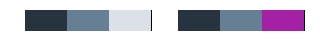

[ 205.18286626  211.50567577  225.29797801]
[-92.77222443  33.84045792 -90.65808868]


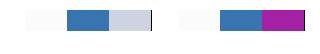

[ 236.1466285   237.09160305  237.71851145]
[-92.77222443  33.84045792 -90.65808868]


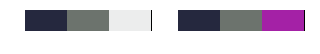

In [362]:
for idx in range(30):
    input_color = np.vstack([color1[idx], color2[idx]])[np.newaxis, :, :]
    color_3_pre = model.predict(input_color)[0]

    true = [color1[idx], color2[idx], color3[idx]]
    predict = [color1[idx], color2[idx], color_3_pre]
    print(color3[idx])
    print(color_3_pre)
    bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
    bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)
    
    plt.figure(figsize = (5, 1))  

    plt.subplot(1, 2, 1)
    plt.imshow(bar_true)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(bar_predict)
    plt.axis('off')
    plt.show()

### Modeling(NN)

In [241]:
# change form
X0.shape, y.shape

((374, 6), (374, 3))

In [267]:
np.random.rand(0)
model1 = Sequential()
model1.add(Dense(10, input_dim=6, activation = "relu"))
model1.add(Dense(3, activation = "linear"))
model1.compile(loss="mse", optimizer="adam")

In [271]:
X = X0/256

In [280]:
history = model1.fit(X0, y, epochs=1000, verbose=0)

Epoch 1/1000
374/374 [==============================] - 0s 104us/step - loss: 166.2635
Epoch 2/1000
374/374 [==============================] - 0s 104us/step - loss: 165.8727
Epoch 3/1000
374/374 [==============================] - 0s 222us/step - loss: 163.1813
Epoch 4/1000
374/374 [==============================] - 0s 183us/step - loss: 165.1946
Epoch 5/1000
374/374 [==============================] - 0s 249us/step - loss: 179.0050
Epoch 6/1000
374/374 [==============================] - 0s 87us/step - loss: 184.5179
Epoch 7/1000
374/374 [==============================] - 0s 257us/step - loss: 165.8378
Epoch 8/1000
374/374 [==============================] - 0s 229us/step - loss: 166.6441
Epoch 9/1000
374/374 [==============================] - 0s 187us/step - loss: 168.6259
Epoch 10/1000
374/374 [==============================] - 0s 175us/step - loss: 165.0675
Epoch 11/1000
374/374 [==============================] - 0s 88us/step - loss: 167.7074
Epoch 12/1000
374/374 [====================

### 확인

In [281]:
X0[0].shape

(6,)

In [282]:
model1.predict(X0)

array([[ 233.67108154,  234.75735474,  236.18276978],
       [ 230.00267029,  230.28271484,  230.40301514],
       [ 228.28158569,  224.78652954,  225.02078247],
       ..., 
       [ 229.89108276,  228.58634949,  228.44515991],
       [ 230.08216858,  230.11611938,  230.41091919],
       [ 235.25253296,  229.90315247,  230.97879028]], dtype=float32)

In [283]:
for idx in range(5):
    input_color = np.vstack([color1[idx], color2[idx]])[np.newaxis, :, :]
    color_3_pre = model1.predict(input_color)[0]

    true = [color1[idx], color2[idx], color3[idx]]
    predict = [color1[idx], color2[idx], color_3_pre]
    
    bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
    bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)
    
    plt.figure(figsize = (5, 1))  

    plt.subplot(1, 2, 1)
    plt.imshow(bar_true)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(bar_predict)
    plt.axis('off')
    plt.show()

ValueError: Error when checking : expected dense_39_input to have 2 dimensions, but got array with shape (1, 2, 3)

### LightGBM

In [ ]:
from lightgbm import lightgbmregressor